In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from profiler import profiler
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# CREATE DATAFRAME
df = pd.read_excel("Megastore Dataset.xlsx")

# NO DUPLICATE ROWS FOUND
# df = df.drop_duplicates()

c:\Users\ajmar\miniconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ajmar\miniconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [2]:
# DEFINE ENCODED VARIABLES 
ordinal_variables = ['Order Priority', 'Segment']
nominal_variables = ['Category', 'Region']

# ORDINAL ENCODING
ordinal_encoder = OrdinalEncoder(categories=[['Low','Medium','High','Critical'],['Consumer','Home Office','Corporate']])
df[ordinal_variables] = ordinal_encoder.fit_transform(df[ordinal_variables])

# ONE-HOT ENCODING
df = pd.get_dummies(df, columns=nominal_variables)

In [3]:
# TRANSACTIONALIZE INTO BINARY MATRIX
basket = (df.groupby(['Order ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order ID'))


In [4]:
basket = basket.map(lambda x: 1 if x > 0 else 0)

In [5]:
basket.to_csv("prepared_megastore_dataset.csv")

In [6]:
# Apriori algorithm & generate association rules

frequent_itemsets = apriori(basket, min_support=0.0001, use_colnames=True, low_memory=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Export association rules to CSV file
rules.to_csv("association_rules.csv")

# success message
print("Apriori algorithm executed successfully, and association rules generated.")

c:\Users\ajmar\miniconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori algorithm executed successfully, and association rules generated.


In [7]:
print(rules.head())
print(rules.shape)
print(frequent_itemsets.head())
print(frequent_itemsets.shape)
print(basket.info())
print(basket.describe())

                                    antecedents  \
0  (#10 White Business Envelopes,4 1/8 x 9 1/2)   
1              (Acco Binding Machine, Recycled)   
2                          (Acco Binder, Clear)   
3                           (Tenex Trays, Blue)   
4          (Adjustable Depth Letter/Legal Cart)   

                        consequents  antecedent support  consequent support  \
0                         (Staples)            0.000272            0.008629   
1              (Acco Binder, Clear)            0.001360            0.001749   
2  (Acco Binding Machine, Recycled)            0.001749            0.001360   
3           (Acco Index Tab, Clear)            0.001477            0.002915   
4                         (Staples)            0.000428            0.008629   

    support  confidence       lift  leverage  conviction  zhangs_metric  
0  0.000117    0.428571  49.667954  0.000114    1.734900       0.980133  
1  0.000117    0.085714  49.005714  0.000114    1.091837       0.98092

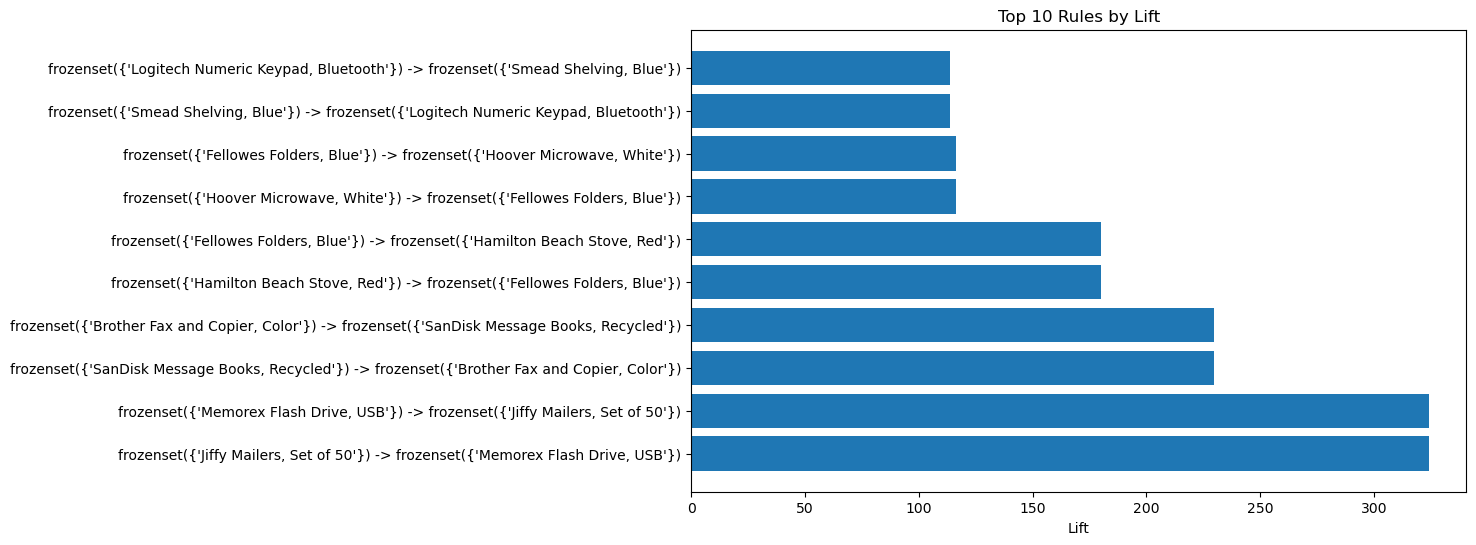

In [10]:
# Sort rules by lift
top10_lift = rules.nlargest(10, 'lift')

# Bar plot of top 10 rules by lift
plt.figure(figsize=(10,6))
plt.barh(range(len(top10_lift)), top10_lift['lift'], align='center')
plt.yticks(range(len(top10_lift)), [f"{a} -> {c}" for a, c in zip(top10_lift['antecedents'], top10_lift['consequents'])])
plt.xlabel('Lift')
plt.title('Top 10 Rules by Lift')
plt.show()


In [15]:
# Display the columns related to support, confidence, and lift
rules[['support', 'confidence', 'lift']].head(10)

,support,confidence,lift
0,0.000117,0.428571,49.667954
1,0.000117,0.085714,49.005714
2,0.000117,0.066667,49.005714
3,0.000117,0.078947,27.082105
4,0.000117,0.272727,31.606880
5,0.000117,0.090909,89.958042
6,0.000117,0.115385,89.958042
7,0.000117,0.061224,32.146606
8,0.000117,0.061224,32.146606
9,0.000117,0.090909,58.472727


In [14]:
# Sort rules by lift in descending order and display the top 3 rules
top_3_rules = rules.sort_values(by='lift', ascending=False).head(3)

# Display the top 3 rules
top_3_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35,"(Memorex Flash Drive, USB)","(Jiffy Mailers, Set of 50)",0.000661,0.000544,0.000117,0.176471,324.302521,0.000116,1.213625,0.997576
34,"(Jiffy Mailers, Set of 50)","(Memorex Flash Drive, USB)",0.000544,0.000661,0.000117,0.214286,324.302521,0.000116,1.271886,0.997459
20,"(Brother Fax and Copier, Color)","(SanDisk Message Books, Recycled)",0.000933,0.000544,0.000117,0.125000,229.714286,0.000116,1.142235,0.996576
